Simple Linear Regression
-----

**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

In [ ]:
# positive relationship, but large variance

(b) Describe the relationship between volume and diameter of these trees.  

In [ ]:
# positive relationship, small variance

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

In [ ]:
# diameter, linear relationship is closer

**Question 2**  

In `utils.csv` are the average utility bills for homes of a particular size and the average monthly temperature.  

Load the data:

In [ ]:
reset -fs

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sms
import seaborn as sns

%matplotlib inline

In [12]:
utils = pd.read_csv('data/utils.csv')
utils.columns = [col.lower().replace(' ', '_') for col in utils.columns.tolist()]
utils

,month,average_bill,average_monthly_temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69
5,Jun,94.5,78
6,Jul,120.0,84
7,Aug,142.5,89
8,Sep,97.5,79
9,Oct,84.0,64


Make a scatter plot of the data bill by tempeture. Which variable would make the most sense as the response variable?

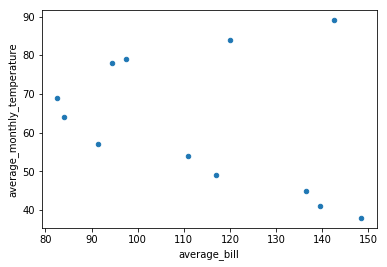

In [14]:
utils.plot(x='average_bill', y='average_monthly_temperature', kind='scatter')

From visual inspection, what is the relationship between the variables?

nonlinear, if modeled by linear regression, equally distributed line, perfect example for heteroscedasticity: the larger the values, the larger the residuals

Fit a simple linear regression using OLS.  

In [45]:
y = utils.average_bill
X = utils.average_monthly_temperature
X = sms.add_constant(X)
model = sms.OLS(y, X, hasconst=True)
results = model.fit()
results.summary()

/Users/geschew/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           average_bill   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.416
Date:                Mon, 28 Oct 2019   Prob (F-statistic):              0.261
Time:                        11:39:08   Log-Likelihood:                -53.778
No. Observations:                  12   AIC:                             111.6
Df Residuals:                      10   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         143.6228     25.995      5.525      0.000      85.701     201.544
average_monthly_temperature    -0.4799      0.403     -1.190      0.261      -1.378       0.419
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.588
Skew:                           0.272   Prob(JB):                        0.745
Kurtosis:                       2.062   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/geschew/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


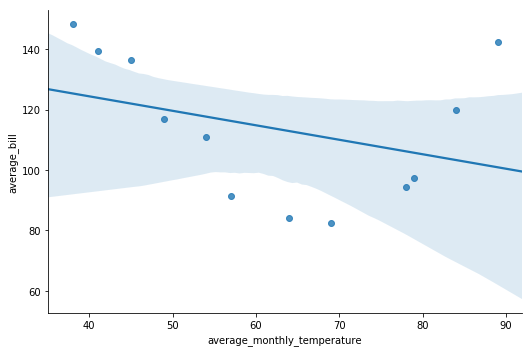

In [25]:
sns.lmplot('average_monthly_temperature', 'average_bill', data=utils, aspect=1.5);

Calculate and interpret the value of $R^2$.  

In [36]:
results.rsquared
# very low, not a good fit

0.12406543648691726

Interpret the intercept and slope coefficients in terms a home owner would understand.

In [58]:
print(results.params[0]) # intercept
print(results.params[1]) # coefficient
print('an increase in temperature results in a decrease of the monthly bill of 0.47')

143.62280506779285
-0.47988441875972554
an increase in temperature results in a decrease of the monthly bill of 0.47


In [61]:
results.params

const                          143.622805
average_monthly_temperature     -0.479884
dtype: float64

What is the 95% confidence interval for the intercept?  

In [57]:
results.conf_int()

,0,1
const,85.701257,201.544353
average_monthly_temperature,-1.378325,0.418556


Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

In [65]:
results.pvalues

const                          0.000253
average_monthly_temperature    0.261487
dtype: float64

depending on alpha, but generally no

Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

<br>

<details><summary>
Click here for a hint…
</summary>
model.predict(…)  
http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html
</details>

In [77]:
results.predict((1, 120))

array([86.03667482])

In [71]:
X

,const,average_monthly_temperature
0,1.0,38
1,1.0,45
2,1.0,49
3,1.0,57
4,1.0,69
5,1.0,78
6,1.0,84
7,1.0,89
8,1.0,79
9,1.0,64


<br>
<br> 
<br>

----